# K-Means Clustering

## Importing the libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import  pandas as pd

## Importing the dataset

In [0]:
df = pd.read_csv('Mall_Customers.csv')
X = df.iloc[:,[3,4]].values

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Using the elbow method to find the optimal number of clusters

In [4]:
from sklearn.cluster import KMeans
k_rng = range(1,10)
wcss = []
for k in k_rng:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30241.34361793659,
 25336.946861471864,
 21850.165282585633]

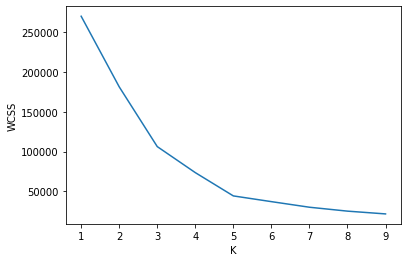

In [5]:
plt.plot(k_rng, wcss)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [0]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42).fit(X)

In [7]:
y_pred = kmeans.predict(X)
y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

## Visualising the clusters

In [0]:
centers = np.array(kmeans.cluster_centers_)

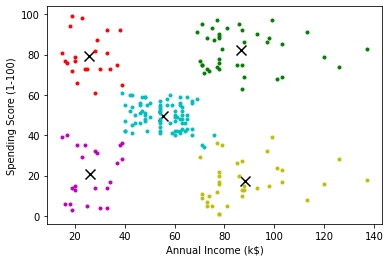

In [9]:
plt.scatter(centers[:,0], centers[:,1],s=100, marker="x",color='k')

plt.plot(X[:,0][y_pred==0], X[:,1][y_pred==0],'r.')
plt.plot(X[:,0][y_pred==1], X[:,1][y_pred==1],'c.')
plt.plot(X[:,0][y_pred==2], X[:,1][y_pred==2],'g.')
plt.plot(X[:,0][y_pred==3], X[:,1][y_pred==3],'m.')
plt.plot(X[:,0][y_pred==4], X[:,1][y_pred==4],'y.')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()